In [1]:
import pandas as pd
import numpy as np
import copy
import itertools as itr
import matplotlib.pyplot as plt
from ggplot import *
%matplotlib inline
pd.options.display.max_columns = 150

C:\Users\silas\AppData\Local\Continuum\anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\silas\AppData\Local\Continuum\anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\silas\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [128]:
%store -r fh_CL_df

In [129]:
# gg_df = fh_CL_df[fh_CL_df['Year'] == 2016].set_index('country_name')

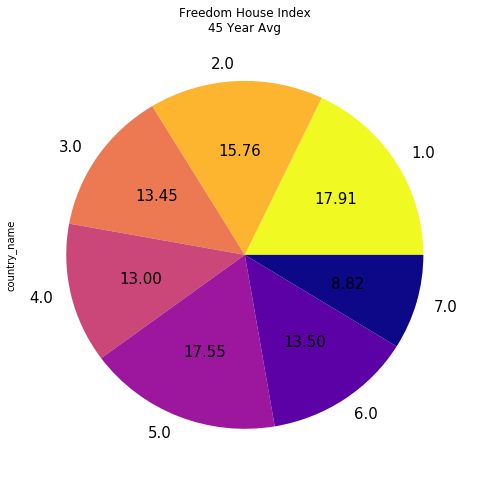

In [132]:
fh_CL_df.groupby('FH_value').count()['country_name'].plot.pie(title='Freedom House Index\n45 Year Avg', autopct='%.2f', fontsize=15, figsize=(8,8),colormap='plasma_r')

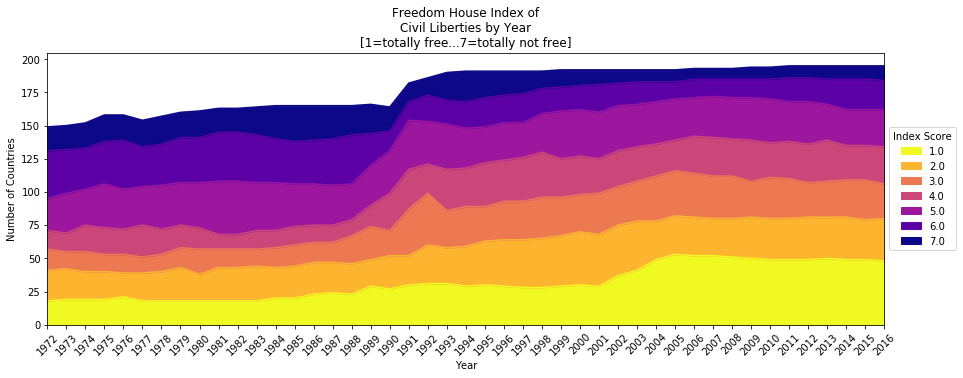

In [103]:
FH_by_year = fh_CL_df.groupby(['Year', 'FH_value']).count()
FH_by_year = FH_by_year.unstack(level=0)
FH_by_year = FH_by_year.reset_index(0)
FH_by_year.columns = ['FH_value'] + list(range(1972,2017))
FH_by_year = FH_by_year.set_index('FH_value').T
plt.figure()
FH_by_year.plot(kind='area', figsize=(15,5),title='Freedom House Index of\nCivil Liberties by Year\n[1=totally free...7=totally not free]', colormap='plasma_r')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Index Score')
plt.xlabel('Year')
plt.ylabel('Number of Countries')
plt.xticks(FH_by_year.index, FH_by_year.index, rotation=45);

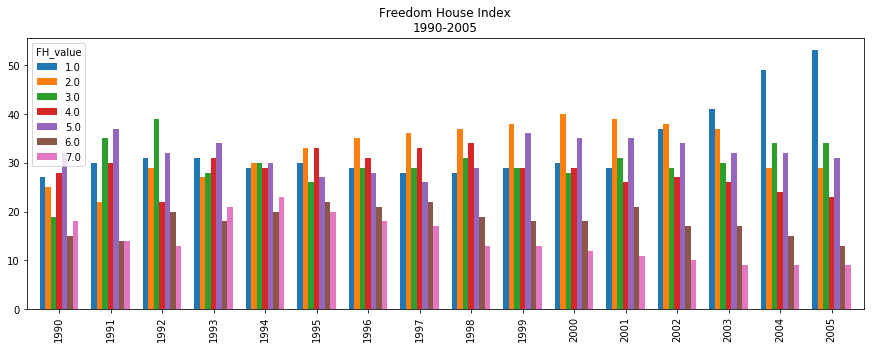

In [113]:
FH_by_year.loc[FH_by_year.index[18:34]].plot(figsize=(15,5), title='Freedom House Index\n1990-2005', kind='bar', width = .75);

AttributeError: Unknown property stack

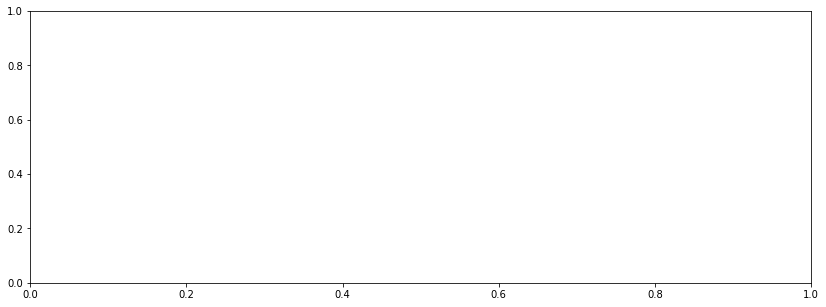

In [134]:
not_free = fh_CL_df[(fh_CL_df['FH_value'] == 6.0)|(fh_CL_df['FH_value'] == 7.0)]
not_free = not_free.groupby('Year').count()
del not_free['FH_value']
not_free.rename(columns={'country_name': 'country_count'}, inplace=True)

free = fh_CL_df[(fh_CL_df['FH_value'] == 1.0)|(fh_CL_df['FH_value'] == 2.0)]
free = free.groupby('Year').count()
free.rename(columns={'country_name':'country_count'}, inplace=True)

partly_free = fh_CL_df[(fh_CL_df['FH_value'] == 3.0)|(fh_CL_df['FH_value'] == 4.0)|(fh_CL_df['FH_value'] == 5.0)]
partly_free = partly_free.groupby('Year').count()
partly_free.rename(columns={'country_name':'country_count'}, inplace=True)

width = .3
fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(111)
rects1 = ax.bar(free.index, not_free['country_count'], width, color='r')
rects2 = ax.bar(free.index+width, free['country_count'], width, color='b')
# rects3 = ax.bar(free.index+width+.5, partly_free['country_count'], width, color='b')

# add some
ax.set_ylabel('Countries')
ax.set_xlabel('Years')
ax.set_title('Not Free vs. Free\nFreedom House')

ax.legend((rects1[0], rects2[0]), ('Not Free', 'Free'));

In [97]:
'''
np.random.seed(0)

x, y = np.random.randn(2, 100)
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.xcorr(x, y, usevlines=True, maxlags=50, normed=True, lw=2)
ax1.grid(True)
ax1.axhline(0, color='black', lw=2)

ax2 = fig.add_subplot(212, sharex=ax1)
ax2.acorr(x, usevlines=True, normed=True, maxlags=50, lw=2)
ax2.grid(True)
ax2.axhline(0, color='black', lw=2)
'''

"\nnp.random.seed(0)\n\nx, y = np.random.randn(2, 100)\nfig = plt.figure()\nax1 = fig.add_subplot(211)\nax1.xcorr(x, y, usevlines=True, maxlags=50, normed=True, lw=2)\nax1.grid(True)\nax1.axhline(0, color='black', lw=2)\n\nax2 = fig.add_subplot(212, sharex=ax1)\nax2.acorr(x, usevlines=True, normed=True, maxlags=50, lw=2)\nax2.grid(True)\nax2.axhline(0, color='black', lw=2)\n"

In [ ]:
# df[df.category.isnull()][['name', 'text']] finds missing fields

In [ ]:
# df.groupby('nationality').size().order(ascending=False).plot(figsize=(10,5), kind='bar')